<a href="https://colab.research.google.com/github/aartikushal/EMBEDDING-SYSTEM-ASSIGNMENT/blob/main/EMBEDDING_SYSTEM_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1. Setup and Data Preparation:***
- Import necessary libraries: pandas, numpy, nltk, sklearn, gensim, matplotlib, seaborn.
- Load the dataset: Choose a dataset for embedding generation.
- Preprocess the text data: Perform cleaning, tokenization, stop-word removal, and other
preprocessing steps.

In [2]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Load the CSV
df = pd.read_csv('Doctor_reviews.csv')
print("Dataset Loaded. Shape:", df.shape)
df.head()

Dataset Loaded. Shape: (8, 2)


,reviewText,overall
0,he is good caring acurate,5
1,the treatment is not good,1
2,pathatiche is very harsh and not listing actua...,3
3,i recommend the doctor,5
4,overall had a very bad experience and the hosp...,2


In [4]:
# Check column names
print(df.columns)

# Preview text content (assuming 'Review' is the column)
df['reviewText'].dropna().head()

Index(['reviewText', 'overall'], dtype='object')


,reviewText
0,he is good caring acurate
1,the treatment is not good
2,pathatiche is very harsh and not listing actua...
3,i recommend the doctor
4,overall had a very bad experience and the hosp...


In [5]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = set(ENGLISH_STOP_WORDS)

def preprocess_text_simple(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = text.split()  # Basic tokenization
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df['clean_text'] = df['reviewText'].astype(str).apply(preprocess_text_simple)
df[['reviewText', 'clean_text']].head()

,reviewText,clean_text
0,he is good caring acurate,good caring acurate
1,the treatment is not good,treatment good
2,pathatiche is very harsh and not listing actua...,pathatiche harsh listing actual issue
3,i recommend the doctor,recommend doctor
4,overall had a very bad experience and the hosp...,overall bad experience hospital professional


# ***2. Bag of Words (BoW):***
- Create a BoW representation: Use `CountVectorizer` from sklearn to convert text into a
matrix of word counts.
- Analyze the BoW matrix: Examine the sparsity and interpret the word frequencies

In [6]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 frequent words (optional)

# Fit and transform the cleaned text
X_bow = vectorizer.fit_transform(df['clean_text'])

# Convert to DataFrame for inspection
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()

,actual,acurate,bad,best,carefully,caring,clearly,cool,diabetes,doctor,...,patients,person,problem,professional,receiving,recommend,required,thank,treatment,type
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
#2. Analyze Sparsity
# Sparsity = percentage of zeros in the matrix
total_elements = X_bow.shape[0] * X_bow.shape[1]
non_zero_elements = X_bow.nnz  # Number of non-zero elements
sparsity = (1 - (non_zero_elements / total_elements)) * 100

print(f"BoW Matrix Shape: {X_bow.shape}")
print(f"Sparsity: {sparsity:.2f}%")

BoW Matrix Shape: (8, 36)
Sparsity: 85.07%


In [8]:
#3. Analyze Word Frequencies
# Sum word occurrences across all documents
word_freq = np.asarray(X_bow.sum(axis=0)).flatten()
freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': word_freq})
freq_df = freq_df.sort_values(by='frequency', ascending=False)

# Top 20 most common words
freq_df.head(20)

,word,frequency
15,good,5
9,doctor,3
26,patients,2
10,experience,2
34,treatment,2
2,bad,1
1,acurate,1
0,actual,1
3,best,1
6,clearly,1


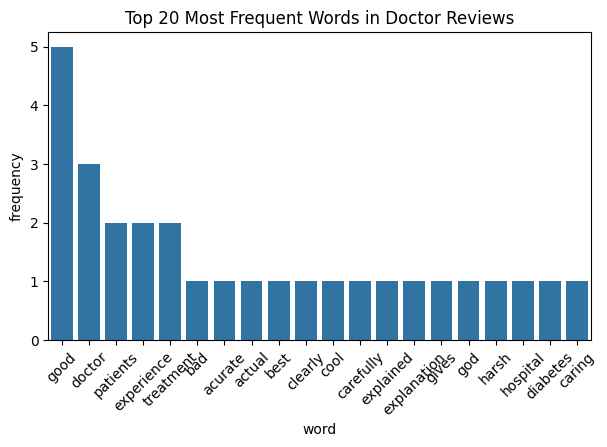

In [24]:
#Visualize Word Frequencies
plt.figure(figsize=(7, 4))
sns.barplot(data=freq_df.head(20), x='word', y='frequency')
plt.title('Top 20 Most Frequent Words in Doctor Reviews')
plt.xticks(rotation=45)
plt.show()

# ***3. TF-IDF:***
- Apply TF-IDF transformation: Use `TfidfVectorizer` to generate TF-IDF features from the text
data.
- Interpret TF-IDF scores: Analyze how TF-IDF weighs different words in the dataset.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
#1.Import and Apply TfidfVectorizer
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the clean text data
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,actual,acurate,bad,best,carefully,caring,clearly,cool,diabetes,doctor,...,patients,person,problem,professional,receiving,recommend,required,thank,treatment,type
0,0.000000,0.629565,0.000000,0.0,0.0,0.629565,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.757092,0.0
2,0.447214,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.586007,...,0.0,0.0,0.0,0.000000,0.0,0.810306,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.461149,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.461149,0.0,0.000000,0.0,0.0,0.000000,0.0


In [12]:
#2. Interpret TF-IDF Scores
# Sum TF-IDF scores for each word across all documents
word_tfidf = np.asarray(X_tfidf.sum(axis=0)).flatten()
tfidf_scores = pd.DataFrame({
    'word': tfidf_vectorizer.get_feature_names_out(),
    'tfidf': word_tfidf
}).sort_values(by='tfidf', ascending=False)

# Show top 20 weighted words
tfidf_scores.head(20)

,word,tfidf
15,good,1.773894
9,doctor,1.049808
34,treatment,1.037579
31,recommend,0.810306
10,experience,0.643471
5,caring,0.629565
1,acurate,0.629565
26,patients,0.537479
2,bad,0.461149
29,professional,0.461149


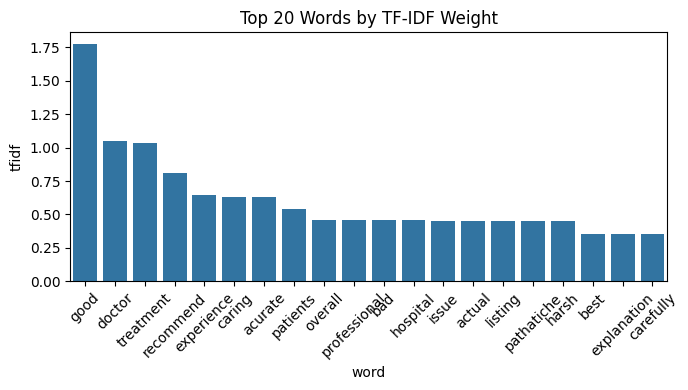

In [28]:
#Visualize TF-IDF Scores
plt.figure(figsize=(7, 4))
sns.barplot(data=tfidf_scores.head(20), x='word', y='tfidf')
plt.title('Top 20 Words by TF-IDF Weight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***4. Word2Vec:***
- Train a Word2Vec model: Use Gensim's `Word2Vec` to train a model on the dataset.
- Extract word vectors: Obtain vector representations for words and visualize them.

In [30]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfre

In [13]:
#1. Install and Import Gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [16]:
#2. Prepare Tokenized Corpus
# Tokenize the cleaned text into lists of words
tokenized_corpus = df['clean_text'].apply(lambda x: x.split()).tolist()
tokenized_corpus[:2]  # Show first 2 tokenized reviews

[['good', 'caring', 'acurate'], ['treatment', 'good']]

In [18]:
#3. Train the Word2Vec Model
# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,     # dimensionality of word vectors
    window=5,            # context window size
    min_count=2,         # ignore words with total frequency lower than this
    workers=4,           # number of CPU cores to use
    sg=1                 # 1 for skip-gram; 0 for CBOW
)

# Build vocabulary and train the model
w2v_model.train(tokenized_corpus, total_examples=len(tokenized_corpus), epochs=10)

(11, 450)

In [19]:
#4. Explore Word Vectors
w2v_model.wv.most_similar('doctor', topn=10)

[('experience', 0.06797593832015991),
 ('treatment', 0.004503030329942703),
 ('good', -0.010839177295565605),
 ('patients', -0.023671656847000122)]

In [20]:
w2v_model.wv['doctor']  # Returns 100-dimensional vector

array([-8.6196875e-03,  3.6657380e-03,  5.1898835e-03,  5.7419385e-03,
        7.4669183e-03, -6.1676754e-03,  1.1056137e-03,  6.0472824e-03,
       -2.8400505e-03, -6.1735227e-03, -4.1022300e-04, -8.3689485e-03,
       -5.6000124e-03,  7.1045388e-03,  3.3525396e-03,  7.2256695e-03,
        6.8002474e-03,  7.5307419e-03, -3.7891543e-03, -5.6180597e-04,
        2.3483764e-03, -4.5190323e-03,  8.3887316e-03, -9.8581640e-03,
        6.7646410e-03,  2.9144168e-03, -4.9328315e-03,  4.3981876e-03,
       -1.7395747e-03,  6.7113843e-03,  9.9648498e-03, -4.3624435e-03,
       -5.9933780e-04, -5.6956373e-03,  3.8508223e-03,  2.7866268e-03,
        6.8910765e-03,  6.1010956e-03,  9.5384968e-03,  9.2734173e-03,
        7.8980681e-03, -6.9895042e-03, -9.1558648e-03, -3.5575271e-04,
       -3.0998408e-03,  7.8943167e-03,  5.9385742e-03, -1.5456629e-03,
        1.5109634e-03,  1.7900408e-03,  7.8175711e-03, -9.5101865e-03,
       -2.0553112e-04,  3.4691966e-03, -9.3897223e-04,  8.3817719e-03,
      

In [40]:
# Example: Get vector for a specific word
word = 'Patiant'
if word in w2v_model.wv:
    print(f"\nVector for word '{word}':\n", w2v_model.wv[word])
else:
    print(f"\nWord '{word}' not found in vocabulary.")


Word 'Patiant' not found in vocabulary.


In [43]:
#Get most similar words
similar_words = w2v_model.wv.most_similar('doctor', topn=5)
print("\nMost similar words to 'doctor':")
for w, score in similar_words:
    print(f"{w}: {score:.4f}")


Most similar words to 'doctor':
thank: 0.2001
minimum: 0.1974
pathatiche: 0.1696
diabetes: 0.1680
harsh: 0.1431


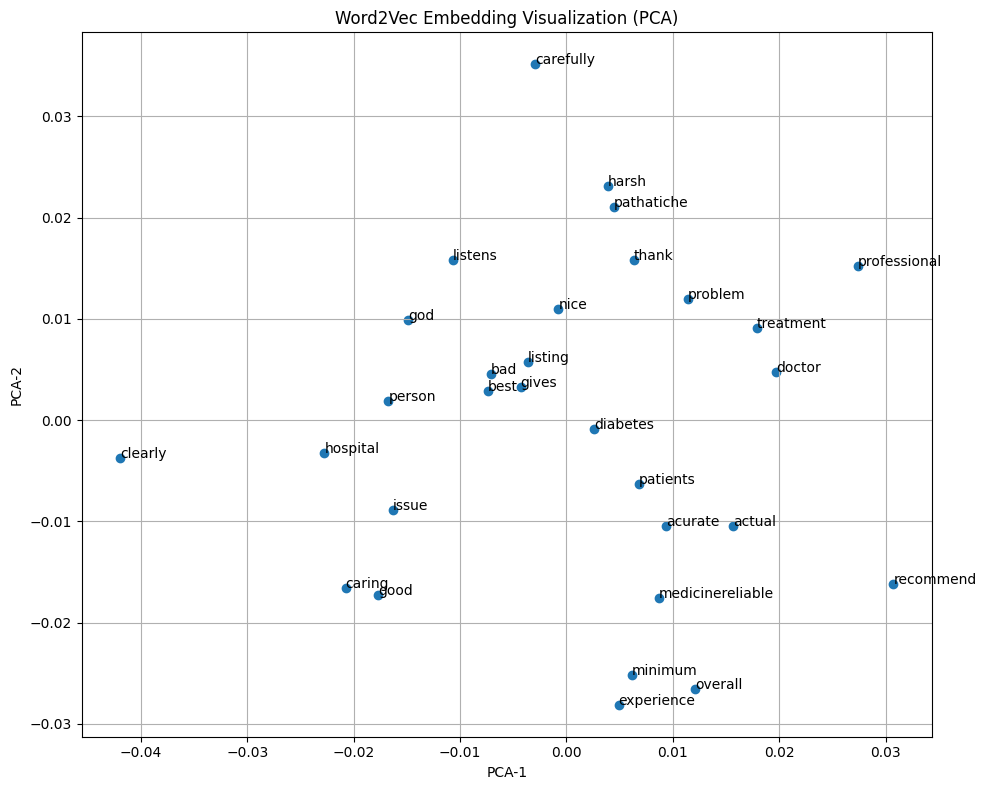

In [46]:
from sklearn.decomposition import PCA
def plot_word_vectors(model, words_to_plot=30):
    words = list(model.wv.key_to_index.keys())[:words_to_plot]
    word_vectors = np.array([model.wv[w] for w in words])

    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.title("Word2Vec Embedding Visualization (PCA)")
    plt.xlabel("PCA-1")
    plt.ylabel("PCA-2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot word vectors
plot_word_vectors(w2v_model)

# ***5. GloVe:***
- Use pre-trained GloVe embeddings: Load GloVe vectors and map words in the dataset to
their corresponding embeddings.
- Train a GloVe model (optional): Use the GloVe package to train embeddings if desired.

In [9]:
import zipfile, os, requests
from tqdm import tqdm

url = "http://nlp.stanford.edu/data/glove.6B.zip"
zip_path = "glove.6B.zip"
txt_path = "glove.6B.100d.txt"

In [11]:
# Download
if not os.path.exists(txt_path):
    print("Downloading GloVe...")
    with requests.get(url, stream=True) as r:
        total = int(r.headers.get('content-length', 0))
        with open(zip_path, 'wb') as f, tqdm(total=total, unit='B', unit_scale=True) as pbar:
            for chunk in r.iter_content(1024):
                f.write(chunk)
                pbar.update(len(chunk))

    # Extract
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extract(txt_path)

    print("Download and extraction complete.")

100%|██████████| 862M/862M [02:38<00:00, 5.44MB/s]


Download and extraction complete.


In [12]:
# Step 1: Check if the file exists
if not os.path.exists(txt_path):
    raise FileNotFoundError(f"GloVe file not found at: {txt_path}")

# Step 2: Load GloVe embeddings into a dictionary
def load_glove_embeddings(filepath, embed_dim=100):
    embeddings_index = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

# Load the GloVe vectors
glove_dict = load_glove_embeddings(txt_path, embed_dim=100)
print(f"Loaded {len(glove_dict)} word vectors from GloVe.")

Loaded 400000 word vectors from GloVe.


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer()              # ✅ Create an instance
tokenizer.fit_on_texts(glove_dict)   # ✅ Fit it to your dataset
tokenizer.word_index                 # ✅ Now you can access word_index

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        vector = glove_dict.get(word)
        if vector is not None:
            embedding_matrix[i] = vector
        else:
            embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

In [25]:
def get_glove_review_vector(text, embeddings, dim=100):
    words = word_tokenize(text)
    valid_vectors = [embeddings[word] for word in words if word in embeddings]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(dim)

In [44]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [48]:
df['glove_vector'] = df['clean_text'].apply(lambda x: get_glove_review_vector(x, glove_dict, 100))

In [49]:
#Convert to matrix for ML or visualization
glove_matrix = np.vstack(df['glove_vector'].values)
print("GloVe review embedding matrix shape:", glove_matrix.shape)

GloVe review embedding matrix shape: (8, 100)


In [51]:
print(df[['clean_text', 'glove_vector']])

                                          clean_text  \
0                                good caring acurate   
1                                     treatment good   
2              pathatiche harsh listing actual issue   
3                                   recommend doctor   
4       overall bad experience hospital professional   
5  doctor nice explained clearly type treatment r...   
6  explanation gives minimum medicinereliable bes...   
7  good experience thank god good person good doc...   

                                        glove_vector  
0  [0.11028049, 0.45786, 0.23443799, -0.06700501,...  
1  [0.1815055, 0.37107003, 0.170185, -0.107495, -...  
2  [-0.10279175, -0.02292228, 0.3739375, 0.147796...  
3  [-0.266118, -0.259263, -0.019560002, 0.39477, ...  
4  [0.2006608, -0.022219408, 0.26170003, 0.085838...  
5  [-0.0881705, 0.15564796, 0.053441167, 0.133907...  
6  [-0.15392287, 0.38249716, 0.4928973, 0.1740877...  
7  [0.0783989, 0.285387, 0.308367, 0.015239191, -...  


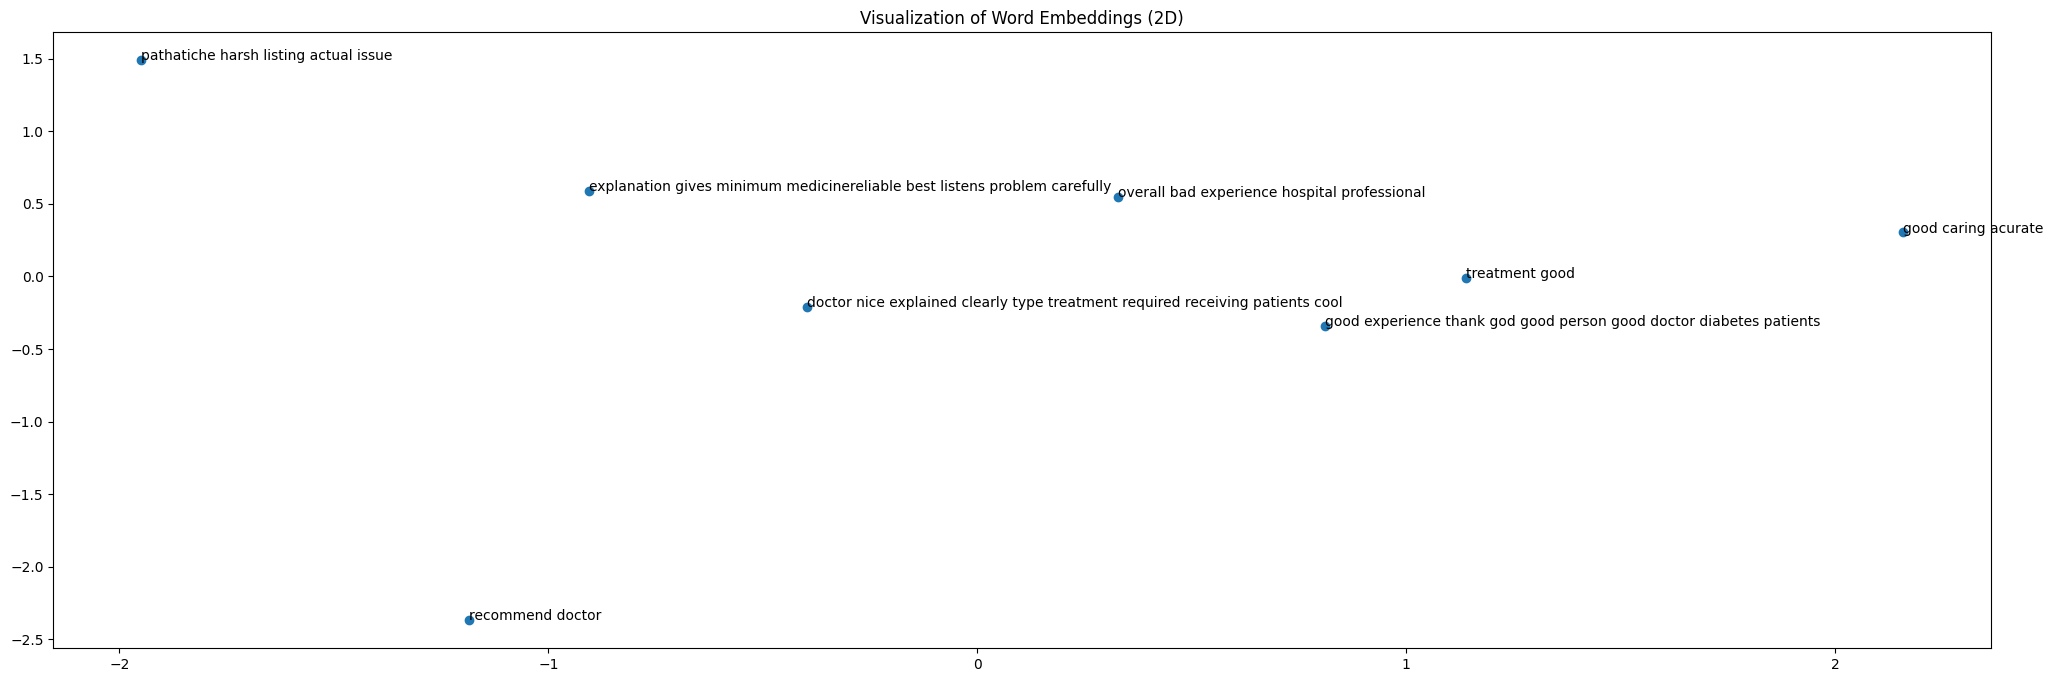

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Get word vectors from the DataFrame (we'll use the first 100 samples for simplicity)
word_vectors = df['glove_vector'].tolist()


# Reduce the dimensionality of word vectors to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot the word embeddings in 2D space
plt.figure(figsize=(25, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])


# Annotate each point with its corresponding cleaned text
for i, text in enumerate(df['clean_text']):
    plt.annotate(text, (pca_result[i, 0], pca_result[i, 1]))


plt.title('Visualization of Word Embeddings (2D)')
plt.show()

# ***6. FastText:***
- Train a FastText model: Use Gensim’s `FastText` to train embeddings that consider subword
information.
- Analyze FastText embeddings: Compare them with Word2Vec and GloVe embedding

In [55]:
#Step 1: Install Gensim (if not already installed)
!pip install gensim --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have nu

In [6]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize
import numpy as np

# Step 2a: Tokenize the cleaned reviews
tokenized_reviews = df['clean_text'].apply(word_tokenize).tolist()

# Step 2b: Train FastText model
fasttext_model = FastText(
    sentences=tokenized_reviews,
    vector_size=100,     # Dimensionality of word vectors
    window=5,            # Context window size
    min_count=1,         # Minimum word frequency
    workers=4,           # Use appropriate number of threads
    sg=1,                # Use skip-gram (sg=1); for CBOW use sg=0
    epochs=20            # Training epochs
)

print("✅ FastText model training complete!")

✅ FastText model training complete!


In [13]:
!pip uninstall numpy gensim -y
!pip install numpy gensim

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which 

In [10]:
word = "Doctor"
if word in fasttext_model.wv:
    print(f"Vector for '{word}':\n", fasttext_model.wv[word])
else:
    print(f"'{word}' not found in FastText vocabulary.")

Vector for 'Doctor':
 [ 6.3566687e-05 -1.7593221e-03 -1.5439054e-04 -1.2640227e-03
 -1.7792484e-03  6.7345094e-04 -1.6054098e-03  1.3683356e-03
  1.5493167e-03 -9.1295042e-05  6.6377822e-04  1.1446259e-03
  2.6059482e-04 -1.9329869e-04  3.6786620e-05 -4.6343438e-04
  4.0276741e-04 -3.1829581e-03 -1.2872719e-03 -2.2223253e-04
  1.6051874e-03 -7.1111188e-04 -1.5776255e-03 -1.1540601e-03
 -1.5736220e-04 -1.4978232e-03  8.1591203e-04 -5.6907465e-04
 -3.6644156e-04  2.8946556e-04  1.2611606e-03 -3.0427528e-04
 -4.7338434e-04 -3.1786142e-03 -1.5508160e-03 -8.3902548e-04
 -2.9839607e-04  1.1061789e-03  1.9868262e-04 -3.9566634e-04
 -3.1253175e-04 -5.0824013e-04  2.5275173e-03 -2.1323629e-04
 -1.6911881e-03  1.1493440e-03  1.5551599e-03 -1.0618598e-03
 -3.7678616e-04  2.8349287e-04 -5.7492964e-04 -4.4808181e-05
 -2.0011254e-03 -1.1824407e-03 -2.3843898e-03  1.0864187e-03
 -5.9834303e-04 -2.6013737e-03 -1.3386764e-03  1.6799057e-04
  2.2323712e-04  1.1345011e-03  9.0532232e-04 -6.5866741e-04
  

In [12]:
print("\nWords similar to 'Doctor':")
similar_words = fasttext_model.wv.most_similar("Doctor", topn=5)
for word, score in similar_words:
    print(f"{word}: {score:.4f}")


Words similar to 'Doctor':
doctor: 0.5464
problem: 0.3120
professional: 0.1390
type: 0.1033
overall: 0.0920


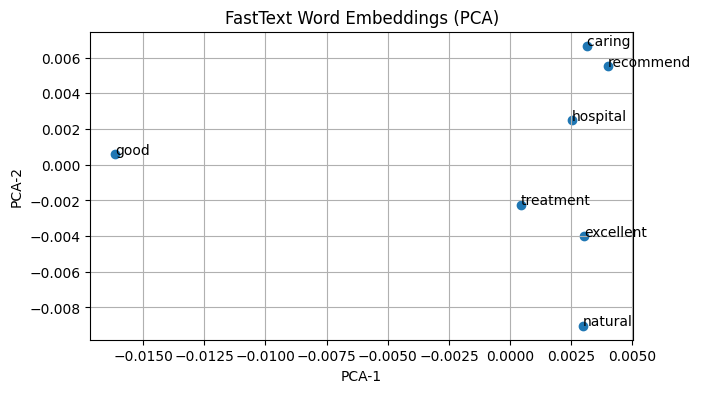

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def visualize_fasttext_words(model, word_list):
    vectors = [model.wv[word] for word in word_list if word in model.wv]
    words = [word for word in word_list if word in model.wv]

    # Reduce dimensions
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.scatter(reduced[:, 0], reduced[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

    plt.title("FastText Word Embeddings (PCA)")
    plt.xlabel("PCA-1")
    plt.ylabel("PCA-2")
    plt.grid(True)
    plt.show()

# Words to visualize
visualize_fasttext_words(fasttext_model, ["caring ", "treatment", "recommend", "excellent", "hospital", "good", "natural"])